In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
import matplotlib as mpl

In [2]:
from navground import sim, core
# Experiment deadlock
num_steps = 400
yaml = f"""
steps: {num_steps}
time_step: 0.1
record_safety_violation: true
record_task_events: true
record_pose: true
runs: 1
scenario:
  type: Cross
  radius: 5
  side: 11
  agent_margin: 0.2
  add_safety_to_agent_margin: true
  tolerance: 0.5
  position_noise: 0.2
  groups:
    - number: 20
      type: thymio
      control_period: 0.1
      behavior:
        type: HL
        safety_margin: 0.8
      radius: 0.2
      kinematics:
        type: 2WDiff
        max_speed: 1.0
        wheel_axis: 2
      state_estimation:
        type: Bounded
        range: 2.0
"""
experiment = sim.load_experiment(yaml)
experiment.run()

In [3]:
run = experiment.runs[0]
ps = run.poses
ps.shape

(400, 20, 3)

In [4]:
def plot_two_timesteps(X, Y, ax):
    # Plot figure
    ax.scatter(X[:,0], X[:,1], s=20, marker="s", c="blue", zorder=2, label="X")
    ax.scatter(Y[:,0], Y[:,1], s=23, marker="x", c="red", zorder=2, label="Y")
    for edge in zip(X, Y):
        edge_pts = np.array(edge)
        ax.plot(edge_pts[:,0], edge_pts[:,1], c="gray", zorder=1)

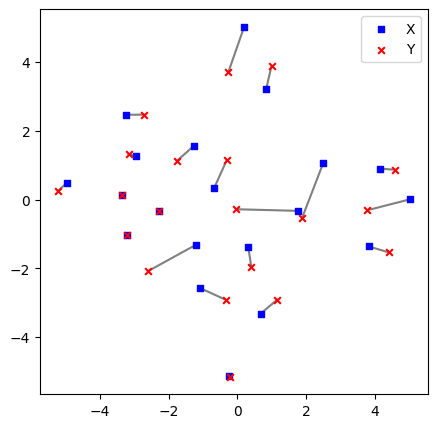

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
X = ps[100] # timestep 100
X = X[:,:2] # forget angles
Y = ps[120][:,:2]
plot_two_timesteps(X, Y, ax)
plt.legend()